# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import re


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat2017 = pd.read_csv('sat_2017.csv')
act2017 = pd.read_csv('act_2017.csv')


In [3]:
df1=pd.DataFrame(sat2017)
df2=pd.DataFrame(act2017)


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
sat2017.head(10)



,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data is on SATS exam. The variables are exam scores, exam location (US States)and participation rates. 


#### 4a. Does the data look complete? 

Answer:
It does look complete in terms of the individual exams. 

#With reference to general knowledge about SAT we assume that the 'Reading, Writing and Language' sections have been consolidated, as are the Math (no calculator) and Math(calculator allowed)sections. There is no suggested that these have been left out in the data provided.

For ACT the data shows all 4 sections of English, Math, Reading & Science.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [6]:
sat2017.describe()
#SAT max and minimum values

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [7]:
act2017.describe()
#ACT max and minimum values

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [8]:
act2017["Composite"].max()
#ACT max values for Composite

'25.5'

In [9]:
act2017["Composite"].min()
#ACT min values for Composite

'17.8'

The maximum and minimum values for the SAT and ACT are shown above.
With reference to general knowledge about SAT exam scores, which range from 200-800 and
ACT scores which are in terms of percentile and range from 1 to 100th percentile, the data coincides with what we know in terms of possible marks range. 

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Composite and participation datatypes seem odd as they are presented as objects instead of integers and/or floats.

In [10]:
sat2017.info()
#sat2017`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [11]:
act2017.info()
#act2017

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


Issue 1: both exams test different subjects, although there is overlap.
Issue 2: SAT uses absolute marks while ACT is in percentile.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [12]:
act2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#code
sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

"The datatypes are as shown."


In [14]:
act2017.dtypes


State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
def convert_to_float(x):
    out=float(x)
    return out


In [16]:

sat2017['Participation']=[x.replace('%','')for x in sat2017['Participation']]
act2017['Participation']=[x.replace('%','')for x in act2017['Participation']]
act2017['Composite']=[x.replace('x','')for x in act2017['Composite']]




- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
sat2017['Participation']= sat2017['Participation'].apply(convert_to_float)
act2017['Participation']= act2017['Participation'].apply(convert_to_float)
act2017['Composite']= act2017['Composite'].apply(convert_to_float)




- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:

act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [19]:
sat2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

- Display the data types again to confirm they are correct.

Participation is now a float.

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [21]:

sat2017.rename(columns={'State':'state', 'Participation':'sat17_participation', 'Evidence-Based Reading and Writing':'sat17_reading_and_writing','Math':'sat17_math','Total':'sat17_total'}, inplace=True )


In [22]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [23]:
act2017.rename(columns={'State':'state', 'Participation':'act17_participation', 'English':'act17_english','Math':'act17_math','Reading':'act17_reading', 'Science':'act17_science','Composite':'act17_composite'},inplace=True)

In [24]:
act2017

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**composite**|*float64*|ACT 18/17|The weighted average score of ACT for English, Math, Reading and Science components| 
|**total**|*int64*|SAT 18/17|The combined total score of SAT for Evidence Based Reading and Writing and Math components|
|**math**|*SAT-int ACT-float*|ACT/SAT 18/17|The Math ACT/SAT score in a respective year| 
|**reading**|*float64*|ACT 18/17|The Reading ACT score in a respective year| 
|**english**|*float64*|ACT 18/17|The English ACT score in a respective year| 
|**science**|*float64*|ACT 18/17|The Science ACT score in a respective year|
|**evidence_based_reading_and_writing**|*int64*|SAT 18/17|The Evidence Based Reading and Writing score in a respective year|
|**participation**|*float64*|ACT/SAT 18/17|The number of college students who take SAT or ACT at least once in any year out of the whole high school graduating class population | 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
act2017=act2017.drop([0])

In [26]:
act2017

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
10,Florida,73.0,19.0,19.4,21.0,19.4,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:

sat_act_combi2017 =pd.merge(left = act2017, right = sat2017, on = 'state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [28]:
sat_act_combi2017.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat17_participation,sat17_reading_and_writing,sat17_math,sat17_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
sat2018 = pd.read_csv('sat_2018.csv')
act2018 = pd.read_csv('act_2018_updated.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [30]:
df3=pd.DataFrame(sat2018)
df4=pd.DataFrame(act2018)


In [31]:
sat2018.head(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [32]:
act2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [33]:
sat2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [34]:
act2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [35]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [36]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [37]:
#to convert object to float in a remaining entry

sat2018['Participation']=[x.replace('%','')for x in sat2018['Participation']]
sat2018['Participation']= sat2018['Participation'].apply(convert_to_float)

In [38]:
act2018.rename(columns={'State':'state', 'Percentage of Students Tested':'act18_participation', 'Average Composite Score':'act18_avg_comp_score','Average English Score':'act18_avg_eng_score','Average Math Score':'act18_ave_math_score','Average Reading Score':'act18_avg_read_score', 'Average Science Score':'act18_avg_sci_score'}, inplace=True)

In [39]:

sat2018.rename(columns={'State':'state', 'Participation':'sat18_participation', 'Evidence-Based Reading and Writing':'sat18_reading_and_writing','Math':'sat18_math','Total':'sat18_total'}, inplace=True)

In [40]:
sat_act_combi2018 =pd.merge(sat2018,act2018,how='left')


In [41]:
sat_act_combi2018

,state,sat18_participation,sat18_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_avg_comp_score,act18_avg_eng_score,act18_ave_math_score,act18_avg_read_score,act18_avg_sci_score
0,Alabama,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,100.0,519,506,1025,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
9,Florida,56.0,550,549,1099,66,19.9,19.2,19.3,21.1,19.5


In [42]:
final=pd.merge(sat_act_combi2017,sat_act_combi2018,how='left')


In [43]:
final

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat17_participation,sat17_reading_and_writing,sat17_math,...,sat18_participation,sat18_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_avg_comp_score,act18_avg_eng_score,act18_ave_math_score,act18_avg_read_score,act18_avg_sci_score
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,...,100.0,519,506,1025,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,...,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,...,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,...,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,...,56.0,550,549,1099,66,19.9,19.2,19.3,21.1,19.5


In [44]:
df5=final

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [45]:

final.describe().T

,count,mean,std,min,25%,50%,75%,max
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_reading_and_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,547.627451,84.909119,52.0,522.00,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [46]:


def calculate_std(a_list):
    diff = []
    sum1 = sum(a_list)
    n = len(a_list)
    mean = sum1/n
    
    for i in a_list:
        difference = i - mean
        diff.append(difference**2)
    
    std_div = ((sum(diff))/n)**0.5
    return(std_div)

#std = sqrt(mean(abs(x - x.mean())**2))
#x.sum() / N, where N = len(x). 


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [47]:

sd = {col.name:calculate_std(col) for col in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}

# this prints out the std div for final combined data

In [48]:
sd

{'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 3.151107895464408,
 'act17_composite': 2.000786081581989,
 'sat17_participation': 34.92907076664508,
 'sat17_reading_and_writing': 45.21697020437866,
 'sat17_math': 84.07255521608297,
 'sat17_total': 91.58351056778743,
 'sat18_participation': 36.946619223539415,
 'sat18_reading_and_writing': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433,
 'act18_participation': 33.745194881997506,
 'act18_avg_comp_score': 2.0855261815801147,
 'act18_avg_eng_score': 2.4222536143202795,
 'act18_ave_math_score': 2.015707255555717,
 'act18_avg_read_score': 2.145891884510421,
 'act18_avg_sci_score': 1.8516885484833543}

In [49]:
#Using numpy std method

import numpy as np
np.std(final)

act17_participation          31.824176
act17_english                 2.330488
act17_math                    1.962462
act17_reading                 2.046903
act17_science                 3.151108
act17_composite               2.000786
sat17_participation          34.929071
sat17_reading_and_writing    45.216970
sat17_math                   84.072555
sat17_total                  91.583511
sat18_participation          36.946619
sat18_reading_and_writing    47.034610
sat18_math                   47.301946
sat18_total                  93.227424
act18_participation          33.745195
act18_avg_comp_score          2.085526
act18_avg_eng_score           2.422254
act18_ave_math_score          2.015707
act18_avg_read_score          2.145892
act18_avg_sci_score           1.851689
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

No, the describe method differs from the manually calculated standard deviation and numpy std method.

Dividing by N-1 gives the sample variance, but NumPy computes the population variance.

sd using describe method = 32.140842
sd using numpy method = 31.824176

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? Wyoming has the highest scores which Alabama has the lowest scores
    - 2018 SAT? Wyoming has the highest scores which Alabama has the lowest scores
    - 2017 ACT? Wyoming has the highest scores which Alabama has the lowest scores
    - 2018 ACT? Wyoming has the highest scores which Alabama has the lowest scores
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT? Wyoming has the highest scores which Alabama has the lowest scores
    - 2018 SAT? Wyoming has the highest scores which Alabama has the lowest scores
    - 2017 ACT? Wyoming has the highest scores which Alabama has the lowest scores
    - 2018 ACT? Wyoming has the highest scores which Alabama has the lowest scores
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [50]:
df5.sort_values(by=['act17_participation','state'], ascending=False)

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat17_participation,sat17_reading_and_writing,sat17_math,...,sat18_participation,sat18_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_avg_comp_score,act18_avg_eng_score,act18_ave_math_score,act18_avg_read_score,act18_avg_sci_score
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2,3.0,626,604,...,3.0,633,625,1257,100,20.0,19.0,19.7,20.6,20.3
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642,649,...,3.0,641,653,1294,100,20.5,19.8,20.3,20.6,20.8
44,Utah,100.0,19.5,19.9,20.8,20.6,20.3,3.0,624,614,...,4.0,480,530,1010,100,20.4,19.7,19.9,20.9,20.5
42,Tennessee,100.0,19.5,19.2,20.1,19.9,19.8,5.0,623,604,...,6.0,624,607,1231,100,19.6,19.4,19.1,19.9,19.6
40,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543,521,...,55.0,547,523,1070,100,18.3,17.3,18.2,18.6,18.5
36,Oklahoma,100.0,18.5,18.8,20.1,19.6,19.4,7.0,530,517,...,8.0,541,521,1062,100,19.3,18.4,18.8,20.1,19.4
33,North Carolina,100.0,17.8,19.3,19.6,19.3,19.1,49.0,546,535,...,52.0,554,543,1098,100,19.1,18.0,19.3,19.5,19.2
28,Nevada,100.0,16.3,18.0,18.1,18.2,17.8,26.0,563,553,...,23.0,574,566,1140,100,17.7,16.6,17.8,18.0,17.9
26,Montana,100.0,19.0,20.2,21.0,20.5,20.3,10.0,605,591,...,10.0,606,592,1198,100,20.0,18.7,19.9,20.7,20.0
25,Missouri,100.0,19.8,19.9,20.8,20.5,20.4,3.0,640,631,...,4.0,633,629,1262,100,20.0,19.5,19.7,20.5,20.0


In [51]:

final[['sat17_participation','state']].agg(['max','min'])

,sat17_participation,state
max,100.0,Wyoming
min,2.0,Alabama


In [52]:
final[['sat18_participation','state']].agg(['max','min'])

,sat18_participation,state
max,100.0,Wyoming
min,2.0,Alabama


In [53]:
final[['act17_participation','state']].agg(['max','min'])

,act17_participation,state
max,100.0,Wyoming
min,8.0,Alabama


In [54]:
final[['act18_participation','state']].agg(['max','min'])

,act18_participation,state
max,100,Wyoming
min,7,Alabama


States that already have 100% participation, would not be t

In [55]:
final[['act17_composite','state']].agg(['max','min'])


,act17_composite,state
max,25.5,Wyoming
min,17.8,Alabama


In [56]:
final[['act18_avg_comp_score','state']].agg(['max','min'])

,act18_avg_comp_score,state
max,25.6,Wyoming
min,17.7,Alabama


In [57]:
final[['sat18_total','state']].agg(['max','min'])



,sat18_total,state
max,1298,Wyoming
min,977,Alabama


In [58]:
final[['sat17_total','state']].agg(['max','min'])



,sat17_total,state
max,1295,Wyoming
min,950,Alabama


Do any states with 100% participation on a given test have a rate change year-to-year?

Answer: Colorado had a sgnificant rate change from 100% to about 30% for ACT. This was likely due to US government policy making it compulsory for all Colorado juniors in public schools as of the school year 2016-2017 to take the SAT.


Do any states show have >50% participation on both tests either year?

Answer: Georgia, Florida, Hawaii, South Carolina

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

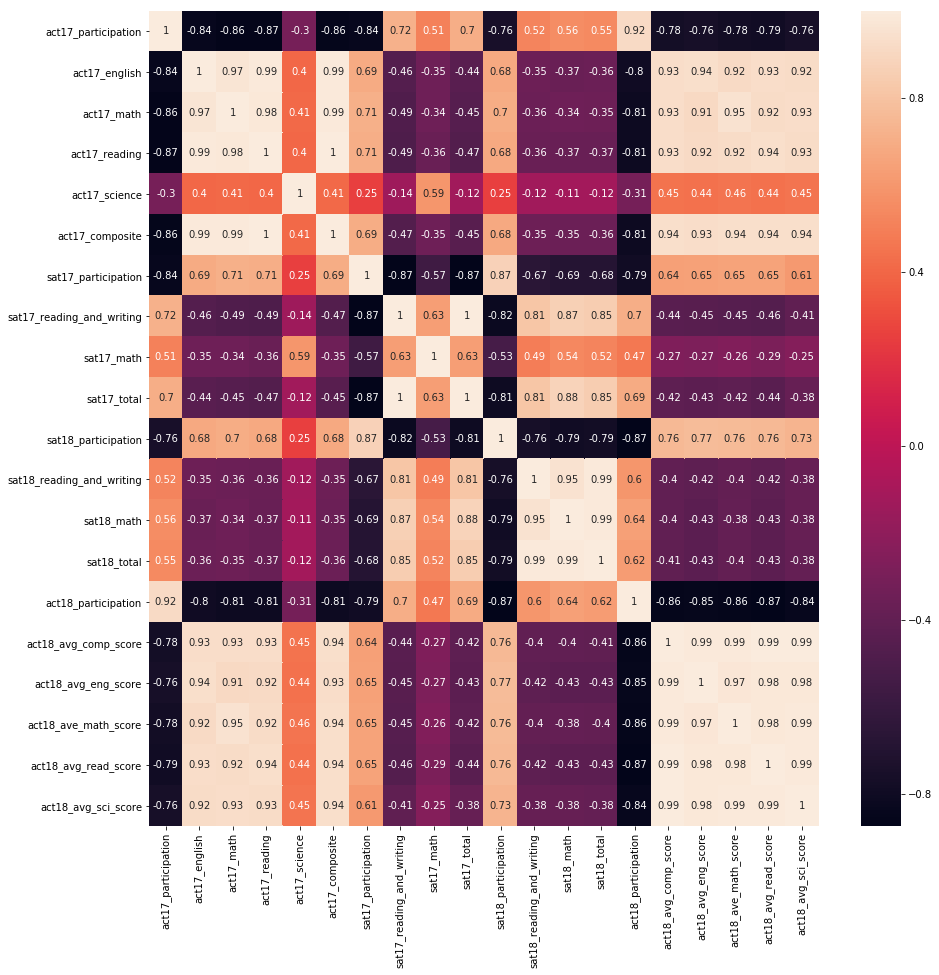

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(final.corr(), annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [60]:
final.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat17_participation,sat17_reading_and_writing,sat17_math,...,sat18_participation,sat18_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_avg_comp_score,act18_avg_eng_score,act18_ave_math_score,act18_avg_read_score,act18_avg_sci_score
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


In [61]:
#saving file for plotting later

final.to_csv('final_tableau.csv') 

In [62]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector,which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].hist(dataframe[list_of_columns[i]])
#         #ax[i].gaussian_kde(dataframe[list_of_columns[i]])
        ax[i].set(title=list_of_titles[i], xlabel=list_of_xlabels[i], ylabel = 'Score')
        


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [63]:
final.sat17_participation.median()


38.0

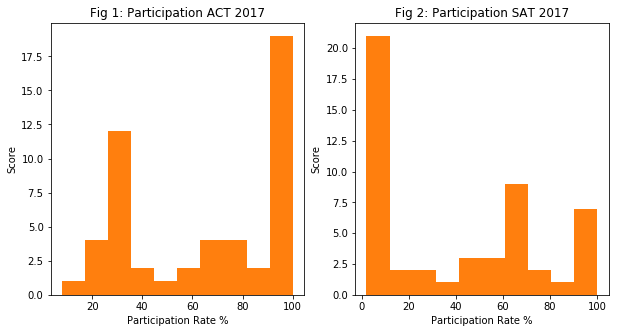

In [64]:
subplot_histograms(final, ['act17_participation', 'sat17_participation',],
                   ['Fig 1: Participation ACT 2017', 'Fig 2: Participation SAT 2017'], 
                   ['Participation Rate %', 'Participation Rate %'])# Code

The histogram in Figure 1 showing the frequency distribution of ACT 2017 participation rates is negatively skewed with the following mean and median and with an outlier:
mean=65  
median=69

The histogram in Figure 2 showing the frequency distribution of SAT 2017 participation rates is positively skewed with the following mean and median:
mean=39  
median=38

This suggests that data for both figures is subjective.

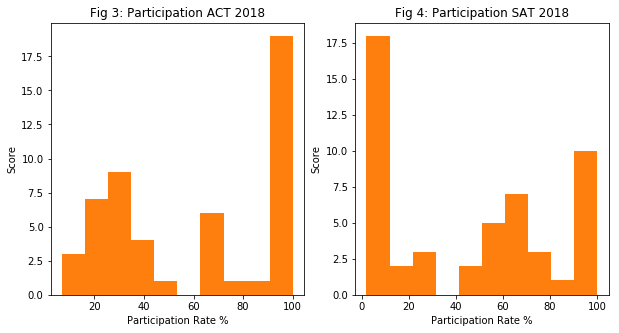

In [65]:
subplot_histograms(final, ['act18_participation', 'sat18_participation',],
                   ['Fig 3: Participation ACT 2018', 'Fig 4: Participation SAT 2018'], 
                   ['Participation Rate %', 'Participation Rate %'])

Similar to the above histograms in terms of skew.

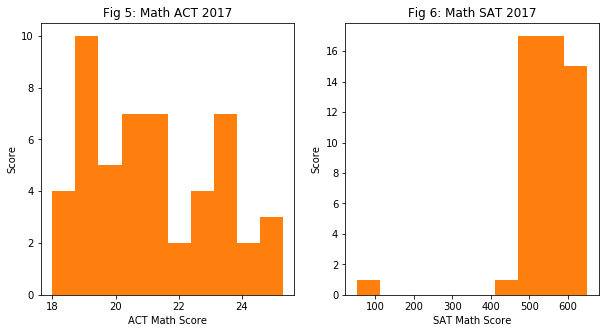

In [66]:
subplot_histograms(final, ['act17_math', 'sat17_math'],
                   ['Fig 5: Math ACT 2017', 'Fig 6: Math SAT 2017'], 
                   ['ACT Math Score', 'SAT Math Score'])# Code



The histogram in Figure 5 showing the frequency distribution of ACT 2017 Math Scores is left skewed. This could suggest that student do not have a firm grasp of the test concepts.

The histogram in Figure 6 showing the frequency distribution of SAT 2017 Math Scores is very negatively skewed. There is an outlier (around 100) which could suggest missing data or some unsual circumstances warranting further investigation. This coincides to the cheating incident reported, where SAT scores of Asian students were cancelled. https://www.voanews.com/student-union/sat-scores-asian-students-cancelled-over-cheating

As it is very right skewed, this could also suggest cheating by other non-Asian students, who did not have their results cancelled or that the students generally found the test easy.

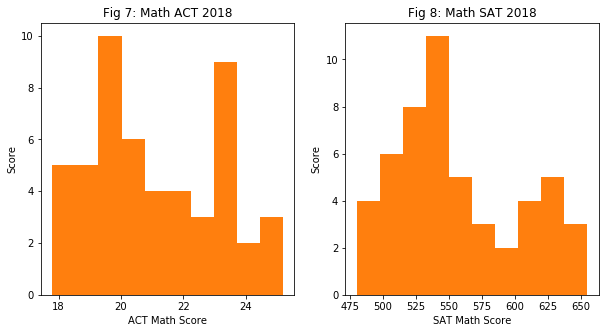

In [67]:
subplot_histograms(final, ['act18_ave_math_score', 'sat18_math'],
                   ['Fig 7: Math ACT 2018', 'Fig 8: Math SAT 2018'], 
                   ['ACT Math Score', 'SAT Math Score'])

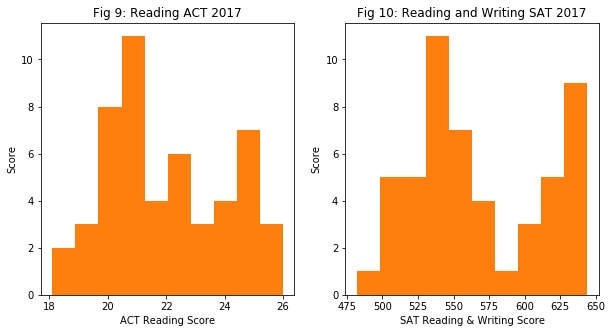

In [68]:
subplot_histograms(final, ['act17_reading','sat17_reading_and_writing'],
                   ['Fig 9: Reading ACT 2017','Fig 10: Reading and Writing SAT 2017'], 
                   ['ACT Reading Score','SAT Reading & Writing Score'])

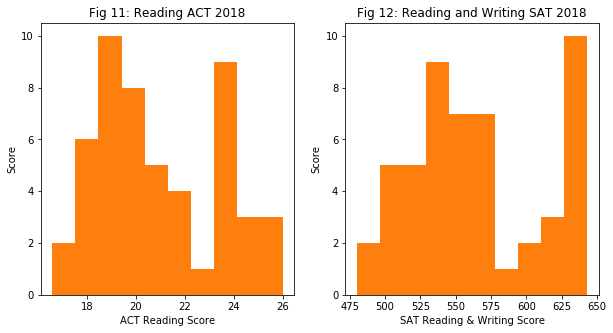

In [69]:
subplot_histograms(final, ['act18_avg_eng_score','sat18_reading_and_writing'],
                   ['Fig 11: Reading ACT 2018','Fig 12: Reading and Writing SAT 2018'], 
                   ['ACT Reading Score','SAT Reading & Writing Score'])

The histograms in Figures 9-12 showing the frequency distribution of Reading and/Writing for ACT and SAT (2017,2018) are not normally distributed with "bunching" of marks. 


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0,0.5,'ACT Math 2017 Score')

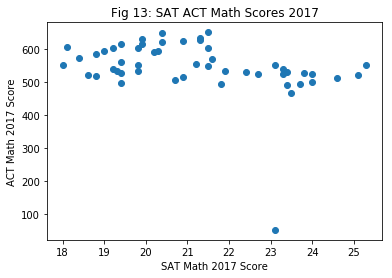

In [70]:
plt.scatter(final['act17_math'], final['sat17_math'])
plt.title('Fig 13: SAT ACT Math Scores 2017')
plt.xlabel('SAT Math 2017 Score')
plt.ylabel('ACT Math 2017 Score')


The scatterplot in Figure 13 showing the relationship between ACT and SAT 2017 Math Scores shows a strong non-linear relationship.

There is also an outlier in Figure 13 similar to Figure 6, likely due to similar events.

Text(0,0.5,'ACT Verbal or Reading 2017 Score')

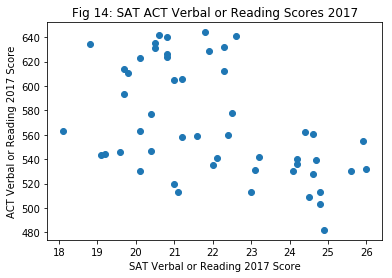

In [71]:

plt.scatter(final['act17_reading'], final['sat17_reading_and_writing'])
plt.title('Fig 14: SAT ACT Verbal or Reading Scores 2017')
plt.xlabel('SAT Verbal or Reading 2017 Score')
plt.ylabel('ACT Verbal or Reading 2017 Score')



The scatterplot in Figure 14 showing the relationship between ACT and SAT 2017 Verbal and/ Writing Scores shows weak or no linear relationship.

Text(0,0.5,'ACT Total/Composite 2017 Score')

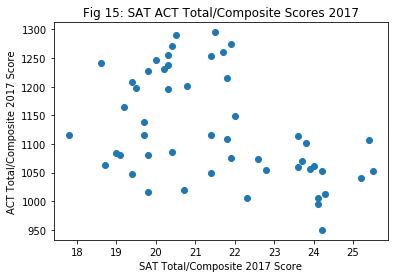

In [72]:

plt.scatter(final['act17_composite'], final['sat17_total'])
plt.title('Fig 15: SAT ACT Total/Composite Scores 2017')
plt.xlabel('SAT Total/Composite 2017 Score')
plt.ylabel('ACT Total/Composite 2017 Score')

Text(0,0.5,'SAT Total 2018 Score')

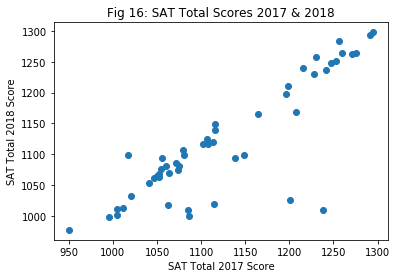

In [73]:
plt.scatter(final['sat17_total'], final['sat18_total'])
plt.title('Fig 16: SAT Total Scores 2017 & 2018')
plt.xlabel('SAT Total 2017 Score')
plt.ylabel('SAT Total 2018 Score')


# Total scores for SAT 2017 vs. 2018


The scatterplot in Figure relationship between SAT 2017 and SAT 2018 is moderately strong, positive and linear with the exception of 2 outliers.

Text(0,0.5,'ACT Composite 2018 Score')

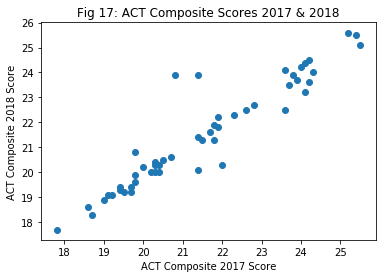

In [74]:
plt.scatter(final['act17_composite'], final['act18_avg_comp_score'])
plt.title('Fig 17: ACT Composite Scores 2017 & 2018')
plt.xlabel('ACT Composite 2017 Score')
plt.ylabel('ACT Composite 2018 Score')



The scatterplot in Figure 17 showing the relationship between ACT Composite 2017 and ACT Composite 2018 is moderately strong, positive and linear.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5,1,'Fig 18: ACT 2017 Composite')

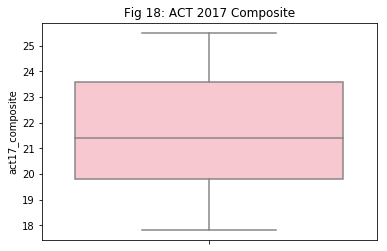

In [75]:

sns.boxplot(df5.act17_composite, orient='v',color="pink")
plt.title('Fig 18: ACT 2017 Composite')

Text(0,0.5,'Scores')

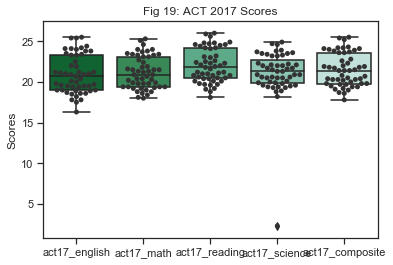

In [76]:

sns.set(style = "ticks", palette = "BuGn_r")
sns.boxplot( data=final, order = ["act17_english", "act17_math", "act17_reading", "act17_science", "act17_composite"])
sns.swarmplot( data=final, order = ["act17_english", "act17_math", "act17_reading", "act17_science", "act17_composite"], color = "0.20")
plt.title('Fig 19: ACT 2017 Scores')
plt.ylabel('Scores')



Text(0,0.5,'Scores')

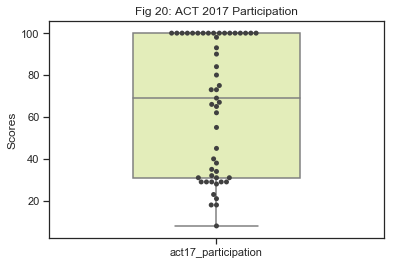

In [77]:

sns.set(style = "ticks", palette = "YlGnBu")
sns.boxplot( data=final, order = ["act17_participation"], width = 0.5)
sns.swarmplot(data=final, order = ["act17_participation"], color = "0.25")
plt.title('Fig 20: ACT 2017 Participation')
plt.ylabel('Scores')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

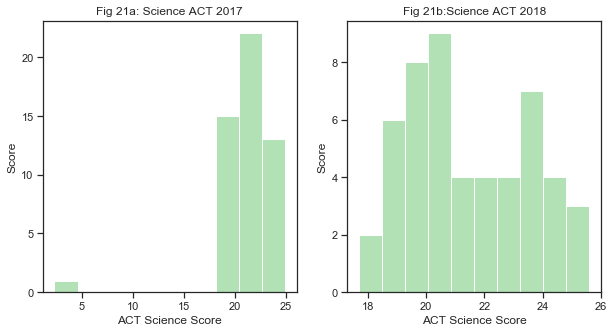

In [80]:
subplot_histograms(final, ['act17_science', 'act18_avg_comp_score'],
                   ['Fig 21a: Science ACT 2017', 'Fig 21b:Science ACT 2018'], 
                   ['ACT Science Score', 'ACT Science Score'])

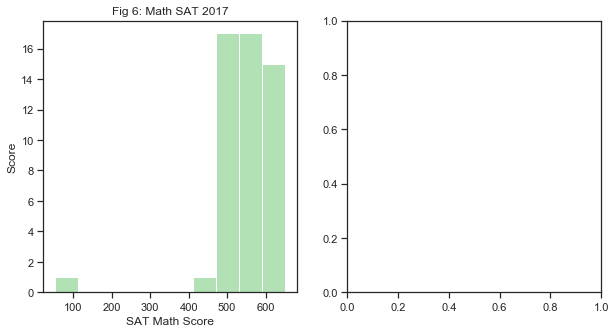

In [81]:
subplot_histograms(final, ['sat17_math'],
                   ['Fig 6: Math SAT 2017'], 
                   ['SAT Math Score'])# Code



Figure 21a is similar to Figure 6. Both are very right skewed, suggesting there could have been cheating by students for the Science exam as well or that students generally found the test easy. 

There is also an outlier (around 100) and suggestion of missing data whereby marks may have been cancelled for the Science exam as well.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [195]:


def get_stats(data_frame): 
    for column in data_frame.columns:
        if column != 'state':
            kurtosis = sc.stats.kurtosis(data_frame[column])
            skewness = sc.stats.skew(data_frame[column])
            var = np.var(data_frame[column])
            mean = np.mean(data_frame[column])
            mode = sc.stats.mode(data_frame[column])
            median = np.mean(data_frame[column])
            print(f'The Kurtosis of {column} is {kurtosis}')
            print(f'The Skewness of {column} is {skewness}')
            print(f'The Varriance of {column} is {var}')
            print(f'The Mean of {column} is {mean}')
            print(f'The Mode of {column} is {mode[1]}')
            print(f'The Median of {column} is {median}')

In [202]:
get_stats(final)

The Kurtosis of act17_participation is -1.5916901032787911
The Skewness of act17_participation is -0.19211796242279808
The Varriance of act17_participation is 1012.7781622452906
The Mean of act17_participation is 65.25490196078431
The Mode of act17_participation is [17]
The Median of act17_participation is 65.25490196078431
The Kurtosis of act17_english is -0.9108196437488862
The Skewness of act17_english is 0.34220217359811805
The Varriance of act17_english is 5.431172625913109
The Mean of act17_english is 20.931372549019606
The Mode of act17_english is [3]
The Median of act17_english is 20.931372549019606
The Kurtosis of act17_math is -1.0011927796225994
The Skewness of act17_math is 0.3228174361152988
The Varriance of act17_math is 3.8512572087658596
The Mean of act17_math is 21.182352941176468
The Mode of act17_math is [4]
The Median of act17_math is 21.182352941176468
The Kurtosis of act17_reading is -1.0038016291000136
The Skewness of act17_reading is 0.2613779187300745
The Varri

In [197]:
final.kurtosis()


act17_participation          -1.631970
act17_english                -0.879307
act17_math                   -0.979210
act17_reading                -0.982094
act17_science                24.180085
act17_composite              -0.983524
sat17_participation          -1.380695
sat17_reading_and_writing    -1.220371
sat17_math                   23.260161
sat17_total                  -1.105461
sat18_participation          -1.569003
sat18_reading_and_writing    -1.055118
sat18_math                   -0.756126
sat18_total                  -1.022725
act18_participation          -1.738681
act18_avg_comp_score         -1.080666
act18_avg_eng_score          -1.071710
act18_ave_math_score         -1.109059
act18_avg_read_score         -1.116031
act18_avg_sci_score          -1.109301
dtype: float64

The kurtosis for both ACT Science and SAT Math Scores in 2017 exceeds 3 and does not show normal distribution.

In [198]:
final.skew()

act17_participation         -0.197989
act17_english                0.352660
act17_math                   0.332683
act17_reading                0.269366
act17_science               -4.099534
act17_composite              0.319810
sat17_participation          0.346450
sat17_reading_and_writing    0.272693
sat17_math                  -3.971030
sat17_total                  0.310903
sat18_participation          0.136228
sat18_reading_and_writing    0.282300
sat18_math                   0.530407
sat18_total                  0.466432
act18_participation         -0.021916
act18_avg_comp_score         0.281962
act18_avg_eng_score          0.371507
act18_ave_math_score         0.269548
act18_avg_read_score         0.201361
act18_avg_sci_score          0.172383
dtype: float64

The skew for both ACT Science and SAT Math Scores in 2017 exceeds 1.96 and does not show normal distribution.

Answers:


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: 

Generally we do not observe this trend.

For example, the participation rates for ACT 2017 and SAT 2017 are heavily skewed to the right and left respectively. 

This could be due to government related policies mandating the SAT to be administered to some or all high school juniors for free for certain states. Hence the distribution would not assume a normal distribution. 


Does This Assumption Hold for:
    - Math - No
    - Reading -Generally no
    - Rates - No
    
A few figures weakly resemble a normal distribution, although with a higher level of signficance.

The individual test components are taken across all states, which could differ in terms of government policy on state testing requirements. However, due to the large sample size, overall estimates made from these data are likely to negate the impact of skew from mandatory testing schemes or other events. Hence test scores and inferences are still likely to follow a normal distribution. Estimates made are likely to be accurate.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No

Aggregation: 
Participation rates have shown to be highly skewed. 
This could be due to different school graduation requirements and policies relating to SAT ot ACT. 

Granularity:
Different population sizes and demographic changes should be considered. The time period of 2 years is also too short for comprehensive trend reading.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: SAT and ACT may have different marking rubrics and different bell curves. Hence comparisons may not be appropriate.

Students may self select themselves to take SAT, further impacting the skew of SAT.


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [83]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

def shapiro_test(data_frame):
    # seed the random number generator
    seed(1)
    for column in data_frame.columns:
        if column != 'State':
            data = data_frame[column]
            # normality test
            stat, p = shapiro(data)
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            # interpret
            alpha = 0.05
            if p > alpha:
                print(f'{column} looks Gaussian (fail to reject H0)')
            else:
                print(f'{column} does not look Gaussian (reject H0)')

In [85]:
shapiro_test(df3)

Statistics=0.856, p=0.000
Participation does not look Gaussian (reject H0)
Statistics=0.927, p=0.004
Evidence-Based Reading and Writing does not look Gaussian (reject H0)
Statistics=0.937, p=0.010
Math does not look Gaussian (reject H0)
Statistics=0.921, p=0.002
Total does not look Gaussian (reject H0)


In [86]:
shapiro_test(df4)

Statistics=0.826, p=0.000
Percentage of Students Tested does not look Gaussian (reject H0)
Statistics=0.950, p=0.030
Average Composite Score does not look Gaussian (reject H0)
Statistics=0.934, p=0.007
Average English Score does not look Gaussian (reject H0)
Statistics=0.951, p=0.034
Average Math Score does not look Gaussian (reject H0)
Statistics=0.953, p=0.042
Average Reading Score does not look Gaussian (reject H0)
Statistics=0.958, p=0.067
Average Science Score looks Gaussian (fail to reject H0)


We will reject the null hypothesis if shapiro is below 5


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?


The collegeboard to increase the participation rate is to convince state lawmakers for the state to participate in the SAT Assessment day where SAT testing replaces some component of specific compulsory in state assessment (example PSAT for New Mexico) and to target states that have a growing population, again, this are usually states with a large population (New Mexico, California, Texas) and benefits from a large migrant population from Latin America.
Choice: California, due to it's sheer population size and current high participation rate that makes it easier to legislate mandatory testing (i.e. capture the additional 30 or so % in participation, which isn so far off and easier to get the state's support but has the high population mass to support a increase in aggregate numbers)
It must also be noted that there are certain factors that affects the participation rate for a state that I currently do not have access to information for:
1) The percentage of universities in-state that require SAT testing (most high school seniors apply to in state colleges and this is a important component to nudge education lawmakers)
2) Whether state budgets allow for tax-payer funding of SATs when their usefulness has been increasingly questioned.
3) The size of the state population, untapped population to be captured if mandatory testing was legislated.
4) Whether state funding for schools depends on how well they have performed on SAT testing, schools that are ranked on SAT outcomes will try to do better for it to get more state funding and lawmakers will be more amicable to mandatory state wide testing.